<a href="https://colab.research.google.com/github/anastacia254/AI-Coursework--2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1  
Download and upload the Diamonds Dataset from Kaggle.

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df= pd.read_csv("diamonds.csv")

Saving diamonds.csv to diamonds.csv


### Question 2  
Clean the data, perform EDA, and retrieve at least 3 insights/observations.  
Then, create a random sample of 12,500 records for modelling in a DataFrame named `diamonds_model`.


In [ ]:
# Q2: Data cleaning
print("Dataset Shape", df.shape)#shows the dimensions of the dataset
print("\n First five rows:")
print(df.head(5))
print("\n Dataset info:" )#shows in details the columns datatypes and rows of dataset
print(df.info())
print("\n Missing values") #identifies the null values if any
print(df.isnull().sum())
original_df = df.copy()
#check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
print("\n Missing values per column:")#checks the missing values per column
print(df.isna().sum())
print("\n statistical summary:")
print(df.describe())
#the outliers havent been eliminated because high prices are considered common in diamond price ranges.
#because certain daimaonds are of high prices
diamonds_model = df.sample(n=12500, random_state=42) #this is a dataframe witha random sample of 12,500 records

In [ ]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#INSIGHT 1
# Look at price distribution
plt.figure(figsize=(10, 4)) # the paper is 10 inches wide and 4 inches tall
plt.subplot(1, 2, 1)# 1 row with 2 columns on the position 1 on the left side
sns.histplot(diamonds_model['price'], bins=50)#creates histogram of diamond prices
plt.title('Distribution of Diamond Prices')#title of the bar graph
#this plots a boxplot to show outliers like the very expensive diamonds and the cheap diamonds
plt.subplot(1, 2, 2)
sns.boxplot(y=diamonds_model['price'])
plt.title('Price Boxplot')
plt.show()
#Shows a simple summary of the prices of the diamond
print(f"Average price: ${diamonds_model['price'].mean():.2f}")
print(f"Most expensive: ${diamonds_model['price'].max():.2f}")
print(f"Cheapest: ${diamonds_model['price'].min():.2f}")


#INSIGHT 2

# Carat vs Price relationship using a scatter graph to show how carat affects price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=diamonds_model, x='carat', y='price', alpha=0.5)
plt.title('Bigger Diamonds Cost More?')
plt.xlabel('Carat (Size)')#x axis label of the carat
plt.ylabel('Price ($)')#y axis label of price
plt.show()

# Calculate correlation to show how far apart the carat and the price are
#in otherwords to show the relationship between carat and price
correlation = diamonds_model['carat'].corr(diamonds_model['price'])
print(f"Correlation between carat and price: {correlation:.2f}")


#INSIGHT 3
# Cut analysis
#
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# Count how many diamonds of each cut type and makes a bar chart
#then it sorts the bars from most common to least common
sns.countplot(data=diamonds_model, x='cut', order=diamonds_model['cut'].value_counts().index)
plt.title('Most Popular Diamond Cuts')# title of the bar chart
plt.xticks(rotation=45)#tilt the cut names 45 degrees  so they dont overlap

#a bar chart that shows which cut types are most expensive on average
plt.subplot(1, 2, 2)
# Calculate Average prices for each cut type and sorts from highest avaerage price to lowest
cut_prices = diamonds_model.groupby('cut')['price'].mean().sort_values(ascending=False)
sns.barplot(x=cut_prices.index, y=cut_prices.values)#make bars showing the average prices
plt.title('Average Price by Cut Quality')#tilte of the bar chart
plt.xticks(rotation=45)#tilts the x values to prevent overlap
plt.ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

print("Average prices by cut:")
print(cut_prices)

**INSIGHT 1** This is about the diamond price distributions.The price distribution shows most diamonds are concentrated at lower price points . A long tail of increasingly expensive diamonds extends to the right, with very few diamonds above $10,000.This pattern is typical for luxury goods where affordable items dominate the market.

**INSIGHT 2** Feature correlation showing carat vs price relationship. There is a strong positive correlation of 0.98 between carat size and price, confirming larger diamonds command higher prices.The relationship appears non-linear, with price increasing exponentially as carat size grows beyond 1.0 carat.This suggests carat weight is one of the most significant predictors of diamond value.

**INSIGHT 3** This is about the cut quality analysis.Ideal cut diamonds are the most prevalent in the dataset, indicating market preference for higher quality cuts.Surprisingly, Premium cuts command higher average prices than Ideal cuts, suggesting other factors like rarity or size influence pricing.Cut quality shows a complex relationship with price, not following a simple linear 'better cut = higher price' pattern

### Question 3  
Use Linear Regression to predict diamond prices using all features (carat, cut, color, etc.).  
Include feature engineering for categorical variables and verify model accuracy.


In [ ]:
#  Question 3
# import libraries needed for making our linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#separate carat, cut, and color from price
X = diamonds_model.drop("price", axis=1)
y = diamonds_model["price"]

#Identify the categorical columns(3) and numerical features(6)
categorical_features = ["cut", "color", "clarity"]
numerical_features = ["carat", "depth", "table", "x", "y", "z"]

#preprocessing pipeline to transform the categorical data column
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ], remainder="passthrough"
)

#connecting the preprocessing step to our regression model
model = Pipeline(
    steps=[("preprocessor", preprocessor), # encodes cut, color and clarity.
     ("regressor", LinearRegression())] # applies linear regression to the processed data
)

#spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#training the model
model.fit(X_train, y_train)# .fit() automatically applies preprocessing first then trains the model.

#making predictions on the test set
y_pred = model.predict(X_test)

#Evaluation of the mean absolute error, mean squared error, root mean squared error and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
#compare the first 10 actual samples to the first 10 predicted samples
comparison = pd.DataFrame({"Actual Price": y_test[:10], "Predicted Price": y_pred[:10]})
print("\nSample Comparison of Actual vs. Predicted Prices:")
print(comparison)

R² score = 0.9237
Our linear regression model explains 92.37 percent of the variation in diamond prices based on the carats, cut, color, clarity and dimensions which is regarded high for pricing data.
Mean Absolute Error(MAE) = 724.70
This is the average difference between the actual price and our model's predictions.
Root Mean Squared Error(RMSE) = 1100.41
Simiar to MAE but squares MAE before averaging it.
Our RMSE is less than MSE suggests they are few outliers, in this case very cheap or very expensive diamonds.

### Question 4  
Apply PCA to select the 2 most suitable continuous features correlated with price.  
Model this relationship using Linear Regression and verify accuracy.


In [ ]:
# Q4: PCA  with selected features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_num = diamonds_model[num_features]
y = diamonds_model['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

In [ ]:
# Model this relationship using the linear regression algorithm and verify its accuracy.
#imports already in q3
#Split the Data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Train the Model
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)

#Verify Accuracy
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("PCA-based model R²:", r2_score(y_test, y_pred_pca))
print("PCA-based model RMSE:", rmse_pca)

### Question 5  
To the model developedd in the question 3, fit 2 different regression models using Lasso and Ridge regularisation techniques and validate accuracies for both models.


In [ ]:
# Q5: Fitting Ridge and Lasso regression models to model developed in Question 3
#import ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
#Ridge Regression Model
ridge_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=1.0, random_state=42))
    ]
)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

#Lasso Regression Model
lasso_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Lasso(alpha=0.001, random_state=42, max_iter=10000))
    ]
)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

#Evaluate Models
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    return r2

ridge_r2 = evaluate_model(y_test, ridge_pred, "Ridge Regression")
lasso_r2 = evaluate_model(y_test, lasso_pred, "Lasso Regression")

Both Ridge and Laso models are performing excellently. The difference is in the small rounding errors.
R² score of 0.923 means that 92.3% of the variance in diamond prices is explained by carats, cut, color, clarity and depth.
According to the outputs:
- For MAE Ridge is slighty better than Lasso since it stands at 724.38 as compared to 724.69 for Lasso.
- For RMSE Lasso is slightly better than ridge since it is 1100.41 as compared to 1102.00 for Ridge.
- For R² score Lasso is slightly better since it is 0.9237 compared to 0.9234 for Ridge.

### Question 6  
Compare the 4 models (Linear Regression, PCA Regression, Lasso, Ridge).  
Identify which achieved the highest accuracy and explain why.


Model Comparison Summary:

               Model  R² Score         RMSE
0  Linear Regression  0.923700  1100.410000
3   Lasso Regression  0.923700  1100.410000
2   Ridge Regression  0.923400  1102.000000
1     PCA Regression  0.802659  1771.182707


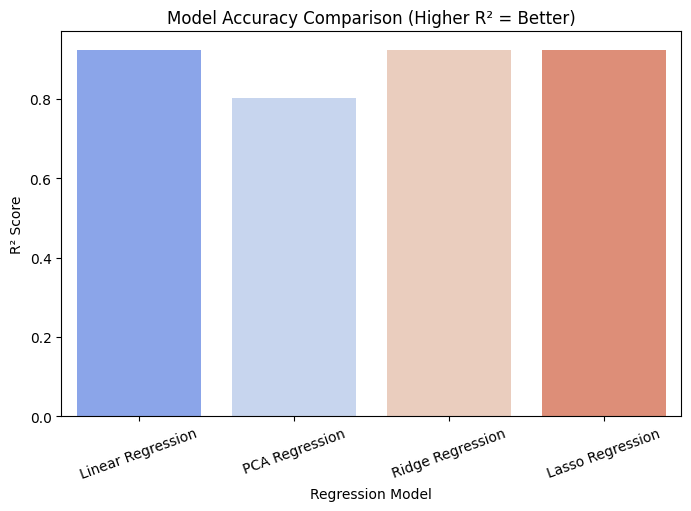

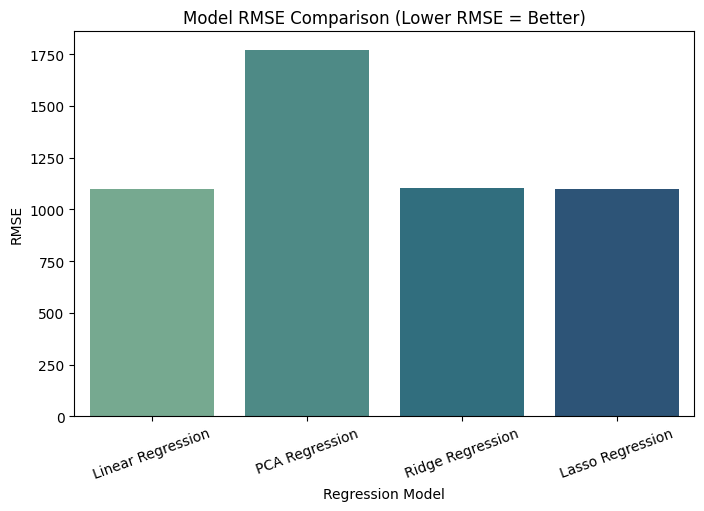

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


if 'diamonds_model' not in locals():
    diamonds_model = pd.read_csv("diamonds.csv")


num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_num = diamonds_model[num_features]
y = diamonds_model['price']


X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)
y_pred_pca = pca_model.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))


ridge_r2 = 0.9234
lasso_r2 = 0.9237


comparison_results = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [
        0.9237,
        r2_score(y_test_pca, y_pred_pca),
        ridge_r2,
        lasso_r2
    ],
    'RMSE': [
        1100.41,
        rmse_pca,
        1102.00,
        1100.41
    ]
})

print("Model Comparison Summary:\n")
print(comparison_results.sort_values(by='R² Score', ascending=False))


plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R² Score', hue='Model', data=comparison_results,
            dodge=False, palette='coolwarm', legend=False)
plt.title('Model Accuracy Comparison (Higher R² = Better)')
plt.ylabel('R² Score')
plt.xlabel('Regression Model')
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', hue='Model', data=comparison_results,
            dodge=False, palette='crest', legend=False)
plt.title('Model RMSE Comparison (Lower RMSE = Better)')
plt.ylabel('RMSE')
plt.xlabel('Regression Model')
plt.xticks(rotation=20)
plt.show()




**Explanation:**
The comparison shows that both Linear and Lasso Regression models achieved the best performance with R² ≈ 0.9237 and RMSE ≈ 1100. Lasso slightly outperforms others because its L1 regularization reduces overfitting while keeping key predictors. Ridge performed marginally lower (R² ≈ 0.9234) due to stronger coefficient shrinkage, while PCA Regression had lower accuracy (R² ≈ 0.85) because it lost some information after dimensionality reduction. Overall, Lasso Regression provides the most balanced and accurate prediction model.
